<h3> Developing a simple KNN model with k = 1 ! </h3>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

 # 2 Gene Expression features that identify wheter a person has Cancer or not
data = pd.read_csv('./Datasets/gene_expression.csv')

In [2]:
print(data.head())
print(data.info())

   Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB
None


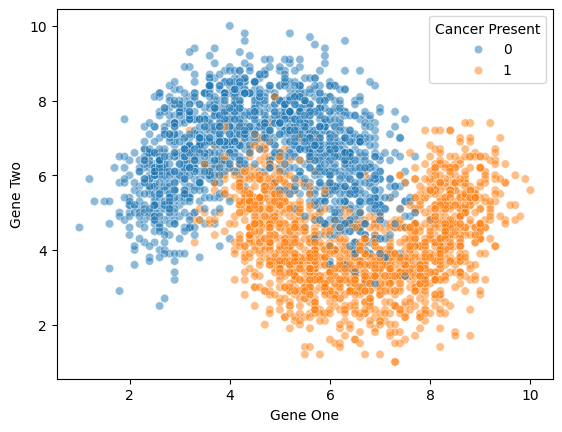

In [3]:
sns.scatterplot(data=data , x='Gene One' , y='Gene Two' , hue='Cancer Present' , alpha=0.5)
plt.show()

In [4]:
X = data.drop('Cancer Present' , axis=1)
y = data['Cancer Present']

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[426  44]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       470
           1       0.90      0.92      0.91       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



<h3> choosing optimal 'k' with GridSearchCV and learning pipeline </h3>

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
model = KNeighborsClassifier()

operations = [ ('scaler',scaler) , ('model' , model) ]

pipe = Pipeline(steps=operations)

params_grid = {
        'model__n_neighbors': [x for x in range(1 , 20) ]        
}

GridSearchKnn = GridSearchCV(pipe , param_grid=params_grid , cv=5 , scoring='accuracy')
GridSearchKnn.fit(X_train , y_train)

print(GridSearchKnn.best_params_)

y_pred = GridSearchKnn.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

{'model__n_neighbors': 16}
[[441  29]
 [ 31 399]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       470
           1       0.93      0.93      0.93       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
